In [13]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import eternabench.chemmapping_utils as utils
import eternabench.stats as stutils
sys.path.append('../scripts')
from ScoreChemMapping import ScoreChemMapping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [6]:
! ls ../data/

ChemMappingCalculations
ChemMappingPreprocessing
DEMO_ChemMapping.json.zip
DEMO_Riboswitch.json.zip
EternaBench_ChemMapping_Example_Correlations_Round1.csv
EternaBench_ChemMapping_Example_PunpVectors_Round1.json.zip
EternaBench_ChemMapping_Filtered_10Jul2021.json.zip
EternaBench_ChemMapping_Full_10Jul2021.json.zip
EternaBench_Riboswitch_Filtered_07Aug2021.json.zip
EternaBench_Riboswitch_Full_07Aug2021.json.zip
ExternalData
ExternalDatasetsCalculations
README.md
RiboswitchCalculations
RiboswitchPreprocessing


In [7]:
# load in data
data = pd.read_json('SuppFigTemperaturescan_29Mar2020.json.zip')

#get data corresponding to Round 69

# write dataframe of all sequences concatenated together
concat_data = utils.write_concatenated_dataframe(data)
concat_data = concat_data.loc[concat_data['in_polyA']==0]
# filter outliers
concat_data = utils.filter_data(concat_data)

n_constructs 1088
5271 of 84643 nucleotides (6.23%) removed, cutoff = 1.14


## Compute correlation between data and package predictions

In [14]:
correlation_data = ScoreChemMapping(data, n_bootstraps=20)

Package list: ['vienna_2_35C', 'nupack_95_35C', 'rnastructure_35C', 'vienna_2_37C', 'nupack_95_37C', 'rnastructure_37C', 'vienna_2_40C', 'nupack_95_40C', 'rnastructure_40C', 'vienna_2_45C', 'nupack_95_45C', 'rnastructure_45C', 'vienna_2_50C', 'nupack_95_50C', 'rnastructure_50C', 'vienna_2_55C', 'nupack_95_55C', 'rnastructure_55C', 'vienna_2_60C', 'nupack_95_60C', 'rnastructure_60C', 'vienna_2_65C', 'nupack_95_65C', 'rnastructure_65C', 'vienna_2_70C', 'nupack_95_70C', 'rnastructure_70C', 'vienna_2_75C', 'nupack_95_75C', 'rnastructure_75C', 'vienna_2_80C', 'nupack_95_80C', 'rnastructure_80C']
n_constructs 1088
Analyzing ETERNA_R69_0000.rdat
5345 of 85952 nucleotides (6.22%) removed, cutoff = 1.15


In [24]:
correlation_data.head()

,pearson,package,bs_ind,filename,package_type,temperature
0,0.663860,vienna_2_35C,0.0,ETERNA_R69_0000.rdat,vienna,35
1,0.661068,nupack_95_35C,0.0,ETERNA_R69_0000.rdat,nupack,35
2,0.661443,rnastructure_35C,0.0,ETERNA_R69_0000.rdat,rnastructure,35
3,0.667102,vienna_2_37C,0.0,ETERNA_R69_0000.rdat,vienna,37
4,0.662941,nupack_95_37C,0.0,ETERNA_R69_0000.rdat,nupack,37


In [16]:
correlation_data['package_type'] = correlation_data.apply(lambda row: row['package'].split('_')[0], axis=1)
correlation_data['temperature'] = correlation_data.apply(lambda row: row['package'].split('_')[-1][:-1], axis=1)

In [25]:
correlation_data.groupby(['package_type','temperature']).agg(['mean','std']).to_csv('ED1b_raw_data.csv')

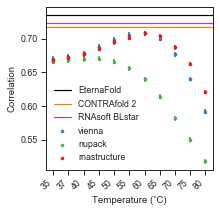

In [18]:
figure(figsize=(3,3))
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]


sns.pointplot(x='temperature', y='pearson', data=correlation_data,
                      hue='package_type', palette=standardized_palette,
                      join=False, ci='sd', marker='.', scale=0.5, dodge=False)

xticks(rotation=45,horizontalalignment='right')


axhline(0.7360404346538927, color=standardized_palette[-1],label='EternaFold')
axhline(0.7179765071297487, color=standardized_palette[-3],label='CONTRAfold 2')
axhline(0.7242348781651908, color=standardized_palette[-2], label='RNAsoft BLstar')

ylabel('Correlation')
xlabel('Temperature (˚C)')
legend(frameon=False)
savefig('FIGURES/SI/ED1B_temp_range.pdf', transparent=True, bbox_inches='tight')